INTRODUCTION

Transportation is one of the crucial factors which affects the development of a particular region. India is one of the countries still trying to get better with her transportation system. However, the country has a combination of several physical features including mountains, deserts, plains, plateaus, hills, valleys and coastal plains. The variety of terrain also calls for effective utilization of different modes of transportation in different parts of the country. Not having adequate means of Transportation might cut-off few parts from the rest of the country making them isoalted and excluded. Similar situation can be witnessed in the North-Eastern Region of India which includes a cluster of several small states covered with dense rainforests on hills. This region makes it difficult for constructing roadways due to the elevation and slope. This calls for an improved waterway navigation system thats helps in connecting the major parts of North-Eastern India

AIM & OBJECTIVE

This project aims at showcasing the transportation system in India in a glimpse which includes both Roadways and Waterways.This is done by comparing the Golden Quadrilateral Route and the course of 13 Operational Waterrways. This demonstration will help us further in understanding the underdeveloped parts of the country primarily because of transportation network. It also explores the scope of increasing connectivity of certain places. This is done by understanding the river system of the counrty and analysing potential new Waterways (or existing non-operational waterways) which can be operational.

In [44]:
!pip install contextily

In [45]:
###STEP -1 : LOAD NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [46]:
### STEP - 2 : GIVE PATH AND LOAD THE RIVER DATA FILES

rivers_path = "/content/ne_10m_rivers_lake_centerlines (2).zip"
rivers = gpd.read_file(rivers_path)

<Axes: >

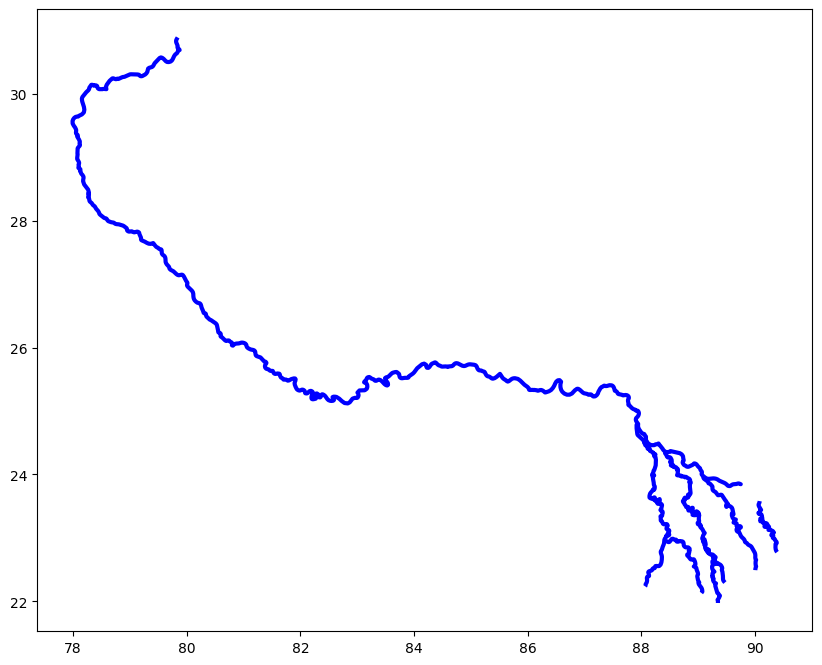

In [47]:
### STEP - 3 : USING GEOPANDAS, CHECK THE DISPLAY OF COURSE OF GANGA

# Filter for the River Ganga (also known as "Ganges")
ganga = rivers[rivers['name'].isin(['Ganges', 'Ganga'])]

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))
ganga.plot(ax=ax, color='blue', linewidth=3)  # Plot the Ganga

In [48]:
### STEP - 4 : CREATE MAP OF INDIA

def create_map():
    # Coordinates of the center of India
    center_of_india = [20.5937, 78.9629]

    # Create a map centered around India with the National Geographic style
    map_of_india = folium.Map(location=center_of_india, zoom_start=5,
                     tiles='https://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{y}/{x}',
                     attr='National Geographic')

    # Adding a marker for demonstration
    folium.Marker(center_of_india, tooltip='Click for more', popup='Center of India').add_to(map_of_india)

    # Save the map as an HTML file
    map_of_india.save('Map_of_India.html')

    print("Map of India has been saved as 'Map_of_India.html'. Open this file in a web browser to view the map.")

if __name__ == '__main__':
    create_map()


Map of India has been saved as 'Map_of_India.html'. Open this file in a web browser to view the map.


In [49]:
### STEP - 5 : OVERLAP THE COURSR OF RIVER GANGA ONTO MAP OF INDIA

# Filter for necessary rivers
ganga = rivers[rivers['name'].isin(['Ganges', 'Ganga'])]

# Convert the rivers GeoDataFrame to GeoJSON
ganga_geojson = ganga.to_json()

# Add the Ganga river as a line on the map
folium.GeoJson(ganga_geojson, name='Ganga River', style_function=lambda x: {'color': 'blue', 'weight': 3}).add_to(map)

# Save the map as an HTML file
map.save('Ganga_on_map_of_India.html')
print("Map has been saved as 'Ganga_on_map_of_India.html'. Open this file in a web browser to view the map.")

Map has been saved as 'Ganga_on_map_of_India.html'. Open this file in a web browser to view the map.


In [50]:
### STEP - 6 : ADD COURSES OF OTHER IMPORTANT RIVERS IN INDIA

# List of major rivers in India to plot
river_names = ['Ganges', 'Brahmaputra', 'Krishna', 'Narmada', 'Godavari', 'Tapi']

# Loop through each river, filter, convert to GeoJSON, and add to map
for river_name in river_names:
    river_data = rivers[rivers['name'].isin([river_name])]
    river_geojson = river_data.to_json()
    folium.GeoJson(river_geojson, name=f'{river_name} River',
                   style_function=lambda x: {'color': 'blue', 'weight': 3}).add_to(map)

# Save the map as an HTML file
map.save('Major_Indian_rivers_map.html')

print("Map has been saved as 'Major_Indian_rivers_map.html'. Open this file in a web browser to view the map.")

Map has been saved as 'Major_Indian_rivers_map.html'. Open this file in a web browser to view the map.


The above map displays the major rivers which contributes to almost 75% of the national waterways. We will now take a look at the important places covered in the course of 13 operational waterways

It is important to understand the contribution of each river for a particular waterway and how much of the waterway is present in each state. The following 2 stacked bar charts emphasizes on this

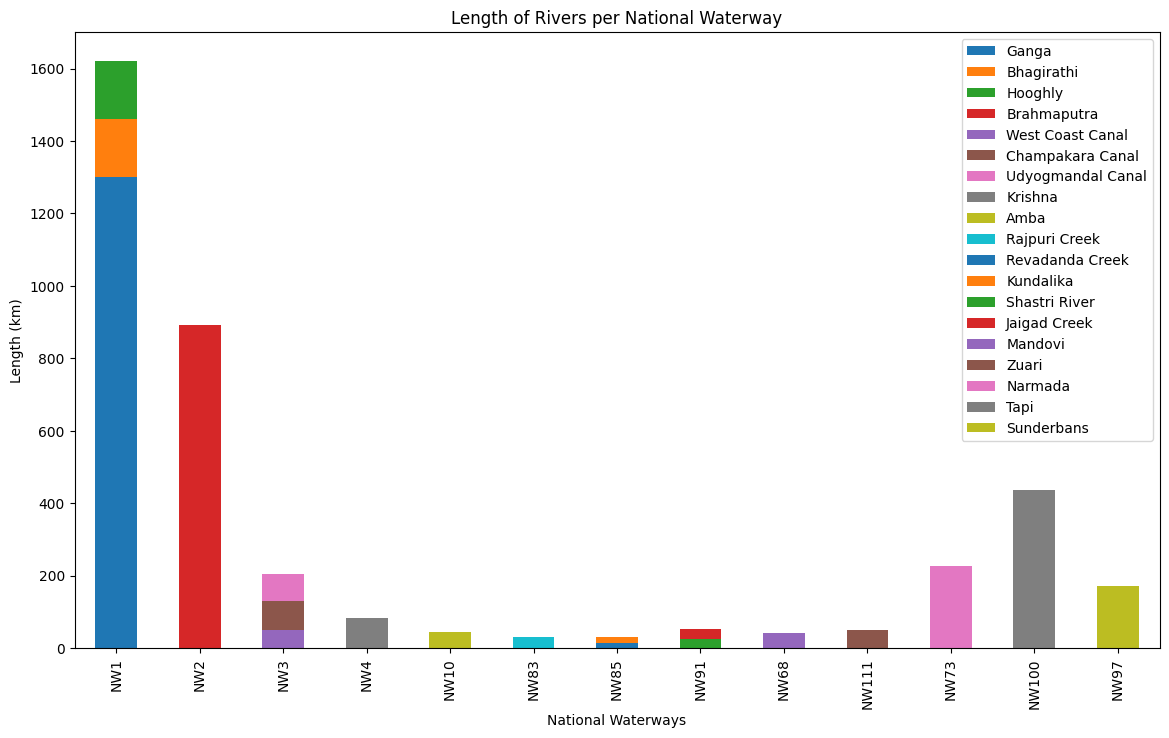

In [51]:
### STEP - 7 : STACKED BAR CHART OF LENGTH OF WATERWAYS AND PROPORTION OF RIVERS

#plot 1: river lenght in waterways
national_waterways_labels = ['NW1', 'NW2', 'NW3', 'NW4', 'NW10', 'NW83', 'NW85', 'NW91', 'NW68', 'NW111', 'NW73', 'NW100', 'NW97']
river_lengths = {
    'Ganga': [1300, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Bhagirathi': [160, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Hooghly': [160, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Brahmaputra': [0, 891, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'West Coast Canal': [0, 0, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Champakara Canal': [0, 0, 80, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Udyogmandal Canal': [0, 0, 75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Krishna': [0, 0, 0, 82, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Amba': [0, 0, 0, 0, 45, 0, 0, 0, 0, 0, 0, 0, 0],
    'Rajpuri Creek': [0, 0, 0, 0, 0, 31, 0, 0, 0, 0, 0, 0, 0],
    'Revadanda Creek': [0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0],
    'Kundalika': [0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0],
    'Shastri River': [0, 0, 0, 0, 0, 0, 0, 26, 0, 0, 0, 0, 0],
    'Jaigad Creek': [0, 0, 0, 0, 0, 0, 0, 26, 0, 0, 0, 0, 0],
    'Mandovi': [0, 0, 0, 0, 0, 0, 0, 0, 41, 0, 0, 0, 0],
    'Zuari': [0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 0, 0, 0],
    'Narmada': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 226, 0, 0],
    'Tapi': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 436, 0],
    'Sunderbans': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 172]
}

# Create DataFrame
national_waterway_composition = pd.DataFrame(river_lengths, index= national_waterways_labels)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
national_waterway_composition.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('National Waterways')
ax.set_ylabel('Length (km)')
ax.set_title('Length of Rivers per National Waterway')
plt.legend()

We can observe that the waterways are primarily formed in the Ganga-Brahmaputra Basin predominantly. The other waterways small and discontinuous.

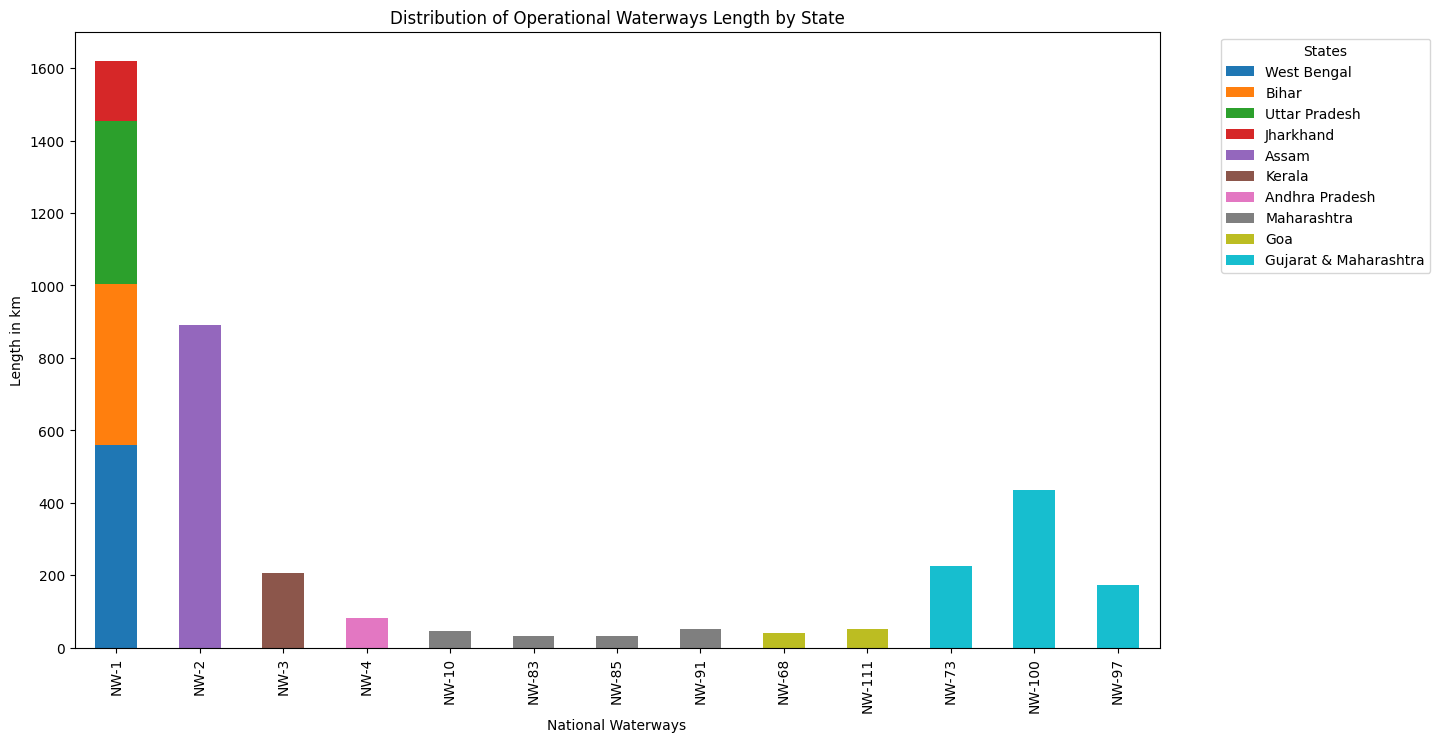

In [52]:
### STEP - 8 : STACKED BAR CHART OF WATERWAY LENGHT BY THE PROPORTION OF STATES IT COVERS

# Adjusting the data for plotting
data_transposed = {
    "West Bengal": [560, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Bihar": [445, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Uttar Pradesh": [450, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Jharkhand": [165, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Assam": [0, 891, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Kerala": [0, 0, 205, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Andhra Pradesh": [0, 0, 0, 82, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Maharashtra": [0, 0, 0, 0, 45, 31, 31, 52, 0, 0, 0, 0, 0],
    "Goa": [0, 0, 0, 0, 0, 0, 0, 0, 41, 50, 0, 0, 0],
    "Gujarat & Maharashtra": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 226, 436, 172]
}
nw_labels = ['NW-1', 'NW-2', 'NW-3', 'NW-4', 'NW-10', 'NW-83', 'NW-85', 'NW-91', 'NW-68', 'NW-111', 'NW-73', 'NW-100', 'NW-97']

# Create DataFrame
df_transposed = pd.DataFrame(data_transposed, index=nw_labels)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
df_transposed.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('National Waterways')
ax.set_ylabel('Length in km')
ax.set_title('Distribution of Operational Waterways Length by State')
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

National Waterway 1 (Ganga-Bhagirathi-Hooghly) is the only waterway which covered multiple states (=4: West Bengal, Uttar Pradesh, Jharkhand, Bihar). Most discontinuous and small waterways (NW-10, NW-83, NW-85, NW-91) are found in Maharashtra. NW-3 is limited to Assam and NW-4 is limited to Andhra Pradesh.

Geographically, Andhra Pradesh and Tamil Nadu states in Southern India have much more potentia; to have an extensive waterway network as rivers such as Krishna, Kaveri and Godavari drain the land. Being close to the coasts, this also gives an easy way to facilitate international transportation too.

In [64]:
### STEP - 9 : Plot the Coorinates of important places covered in GOLDEN QUADRILATERAL
import folium

def create_map():
    # Coordinates of the center of India
    center_of_india = [20.5937, 78.9629]

    # Create a map centered around India with the National Geographic style
    map = folium.Map(location=center_of_india, zoom_start=5,
                     tiles='https://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{y}/{x}',
                     attr='National Geographic')

    # Adding markers and connecting them sequentially
    coordinates = [
        [28.4595, 77.0266],  # Gurugram
        [28.4089, 77.3178],  # Faridabad
        [28.1487, 77.3300],  # Palwal
        [27.4924, 77.6737],  # Mathura
        [27.1767, 78.0081],  # Agra
        [27.1500, 78.3947],  # Firozabad
        [26.7774, 79.0217],  # Etawah
        [26.4655, 79.5177],  # Auraiya
        [26.4499, 80.3319],  # Kanpur
        [25.9319, 80.8134],  # Fatehpur
        [25.4358, 81.8463],  # Prayagraj
        [25.3176, 82.9739],  # Varanasi
        [24.9497, 84.0119],  # Sasaram
        [24.7955, 85.0002],  # Gaya
        [23.7957, 86.4304],  # Dhanbad
        [23.2325, 87.8630],  # Bardhaman
        [22.5897, 88.3100],  # Howrah
        [22.5726, 88.3639],  # Kolkata
        [21.4927, 86.9356],  # Balasore
        [20.4625, 85.8828],  # Cuttack
        [20.2961, 85.8245],  # Bhubaneswar
        [20.1652, 85.6208],  # Khordha
        [19.3610, 84.7981],  # Chhatrapur
        [18.2960, 83.8967],  # Srikakulam
        [17.6868, 83.2185],  # Vishakhapatnam
        [17.0052, 81.7832],  # Rajamundry
        [16.7104, 81.0952],  # Eluru
        [16.3067, 80.4365],  # Guntur
        [15.5057, 80.0497],  # Ongole
        [14.4426, 79.9865],  # Nellore
        [13.0827, 80.2707],  # Chennai
        [12.9165, 79.1325],  # Vellore
        [12.5186, 78.2133],  # Krishnagiri
        [13.3376, 77.1010],  # Tumakuru
        [14.2226, 76.4006],  # Chitradurga
        [14.4644, 75.9210],  # Davangere
        [14.7937, 75.4031],  # Haveri
        [15.3647, 75.1239],  # Hubbali
        [15.3647, 75.1239],  # Dharwad
        [15.8497, 74.4977],  # Belagavi
        [16.7050, 74.2433],  # Kolhapur
        [17.6868, 74.0009],  # Satara
        [18.5204, 73.8567],  # Pune
        [19.2183, 72.9781],  # Thane
        [20.5996, 72.9342],  # Valsad
        [20.9524, 72.9322],  # Navsari
        [21.7051, 72.9959],  # Bharuch
        [22.3072, 73.1812],  # Vadodara
        [22.5644, 72.9289],  # Anand
        [23.2156, 72.6369],  # Gandhinagar
        [23.6003, 72.9626],  # Himmatnagar
        [24.5854, 73.7125],  # Udaipur
        [24.8799, 74.6234],  # Chittorgarh
        [25.3470, 74.6408],  # Bhilwara
        [26.4499, 74.6399],  # Ajmer
        [26.9124, 75.7873],  # Jaipur
        [28.4595, 77.0266]   # Gurugram (to close the loop)
    ]

    # Add markers and connect them sequentially
    folium.PolyLine(locations=coordinates, color='blue').add_to(map)
    for coordinate in coordinates:
        folium.Marker(coordinate).add_to(map)

    # Save the map as an HTML file
    map.save('golden_quadrilateral_map.html')

    print("Map has been saved as 'golden_quadrilateral_map.html'. Open this file in a web browser to view the map.")

if __name__ == '__main__':
    create_map()


Map has been saved as 'golden_quadrilateral_map.html'. Open this file in a web browser to view the map.


In [55]:
### STEP - 10 : COMPILED LENGHT OF ROADWAY AND RAILWAY

# Data for the merged table
compiled_roadway_waterway_length = {
    "State": ["Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chhattisgarh", "Goa", "Gujarat", "Haryana",
              "Himachal Pradesh", "Jharkhand", "Karnataka", "Kerala", "Madhya Pradesh", "Maharashtra", "Manipur",
              "Meghalaya", "Mizoram", "Nagaland", "Odisha", "Punjab", "Rajasthan", "Sikkim", "Tamil Nadu", "Telangana",
              "Tripura", "Uttar Pradesh", "Uttarakhand", "West Bengal", "Jammu and Kashmir"],
    "Length of National Highways (km)": [8683, 2500, 3846, 5321, 3078, 264, 6174, 3122, 2642, 2593, 7540, 1782,
                                         10862, 18000, 1746, 1248, 1428, 1296, 4842, 3782, 11716, 356, 6936, 4193,
                                         853, 12429, 2950, 3083, 2826],
    "Total Length of Operational Waterways (km)": [82, 0, 891, 445, 0, 91, 226, 0, 0, 165, 0, 205, 0, 159, 0, 0, 0, 0,
                                                   0, 0, 0, 0, 0, 0, 0, 450, 0, 732, 0]
}


In [56]:
# Create DataFrame
compiled_roadway_waterway_length = pd.DataFrame(compiled_roadway_waterway_length)

# Calculate total length of roadway and waterway
compiled_roadway_waterway_length["Total Length"] = (
    compiled_roadway_waterway_length["Length of National Highways (km)"] +
    compiled_roadway_waterway_length["Total Length of Operational Waterways (km)"]
)

# Sort DataFrame by total length in descending order
compiled_roadway_waterway_length_sorted_all = (
    compiled_roadway_waterway_length.sort_values(by="Total Length", ascending=False)
)

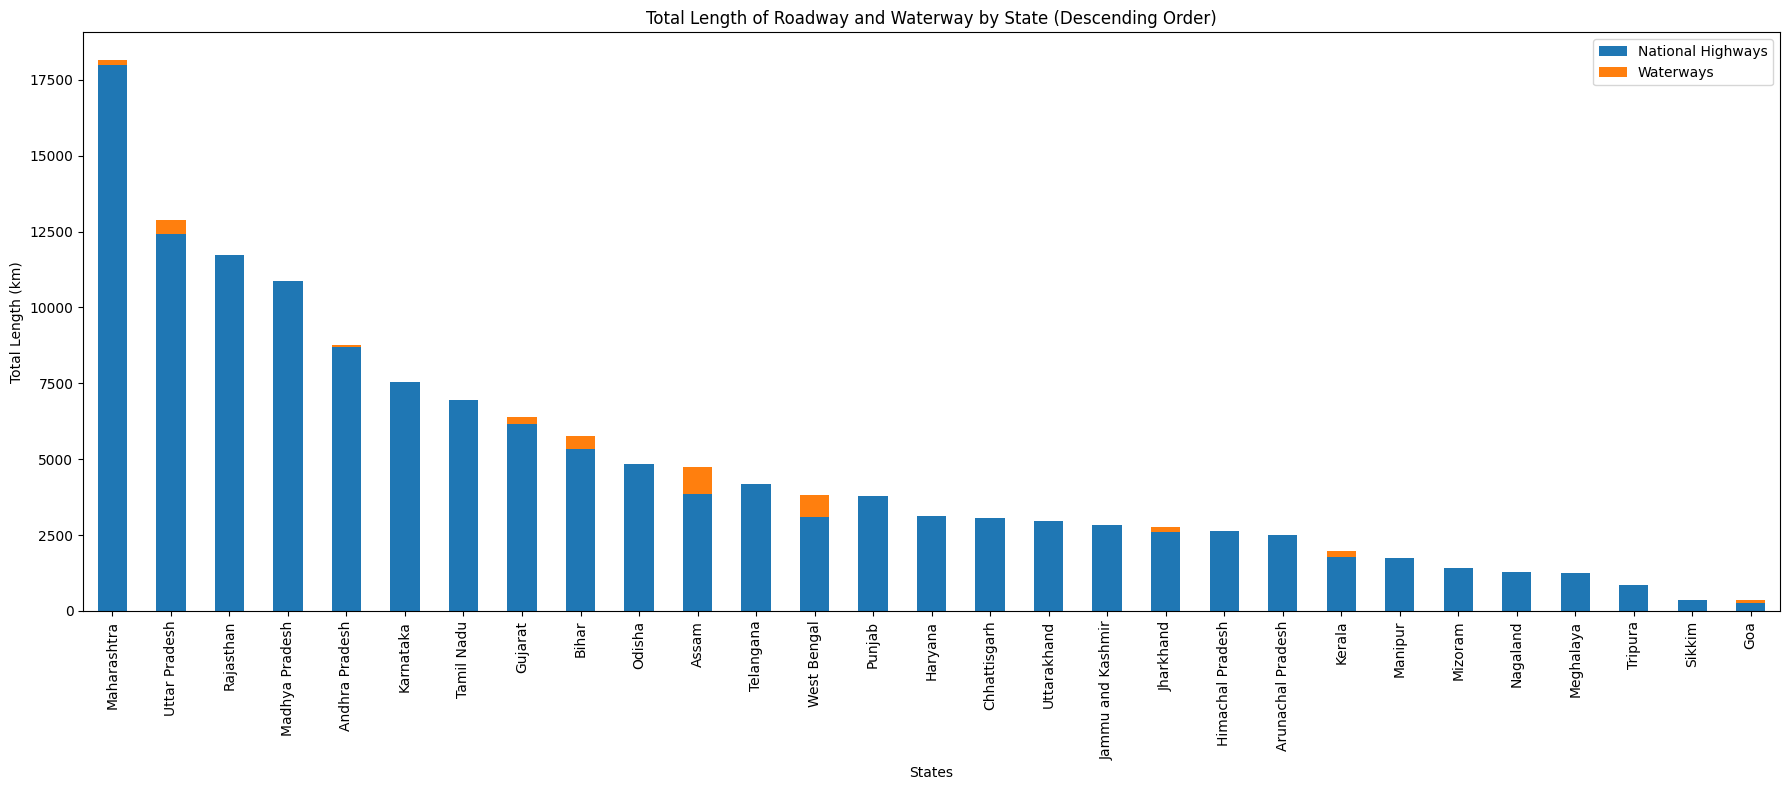

In [57]:
# Plotting all states together, sorted by total length
fig, ax = plt.subplots(figsize=(18, 8))
data_to_plot = compiled_roadway_waterway_length_sorted_all.set_index("State")[
    ["Length of National Highways (km)", "Total Length of Operational Waterways (km)"]
]
data_to_plot.plot(
    kind='bar', stacked=True, ax=ax,
    title="Total Length of Roadway and Waterway by State (Descending Order)"
)
ax.set_ylabel('Total Length (km)')
ax.set_xlabel('States')
ax.legend(["National Highways", "Waterways"])

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


This graph gives the rough idea of which states have majority of roads (considering National Highways). However, it only gives the absolute number of kilometres of road/water route available. Thi can be misleaading as the states are of varying sizes. In order to get a fair represntation, we shall now consider the lenght of roadway / waterway per km - square area of that state in avaerage.

In [58]:
### STEP - 11 : GRAPH OF ROAD/WATER WAYS PER KM-SQUARE ARE IN A STATE

compiled_road_water_and_state_area = {
    "State": ["Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chhattisgarh", "Goa", "Gujarat", "Haryana",
              "Himachal Pradesh", "Jharkhand", "Karnataka", "Kerala", "Madhya Pradesh", "Maharashtra", "Manipur",
              "Meghalaya", "Mizoram", "Nagaland", "Odisha", "Punjab", "Rajasthan", "Sikkim", "Tamil Nadu", "Telangana",
              "Tripura", "Uttar Pradesh", "Uttarakhand", "West Bengal", "Jammu and Kashmir"],
    "Area (km²)": [162970, 83743, 78438, 94163, 135192, 3702, 196024, 44212, 55673, 79714, 191791, 38863, 308252, 307713,
                   22327, 22429, 21081, 16579, 155707, 50362, 342239, 7096, 130058, 112077, 10492, 243290, 53483, 88752, 222236],
    "Total Length": [8765, 2500, 4737, 5766, 3078, 355, 6400, 3122, 2642, 2758, 7540, 1987, 10862, 18159,
                     1746, 1248, 1428, 1296, 4842, 3782, 11716, 356, 6936, 4193, 853, 12879, 2950, 3815, 2826]
}

In [59]:
# Create DataFrame
compiled_road_water_and_state_area = pd.DataFrame(compiled_road_water_and_state_area)

# Calculate proportion of roads per square kilometer
compiled_road_water_and_state_area['Proportion Roads per km²'] = (
    compiled_road_water_and_state_area['Total Length'] /
    compiled_road_water_and_state_area['Area (km²)']
)
# Sort and select the bottom 5 states by proportion of roads per km²
compiled_road_water_and_state_area_sorted = (
    compiled_road_water_and_state_area
    .sort_values(by='Proportion Roads per km²')
    .head(5)
)

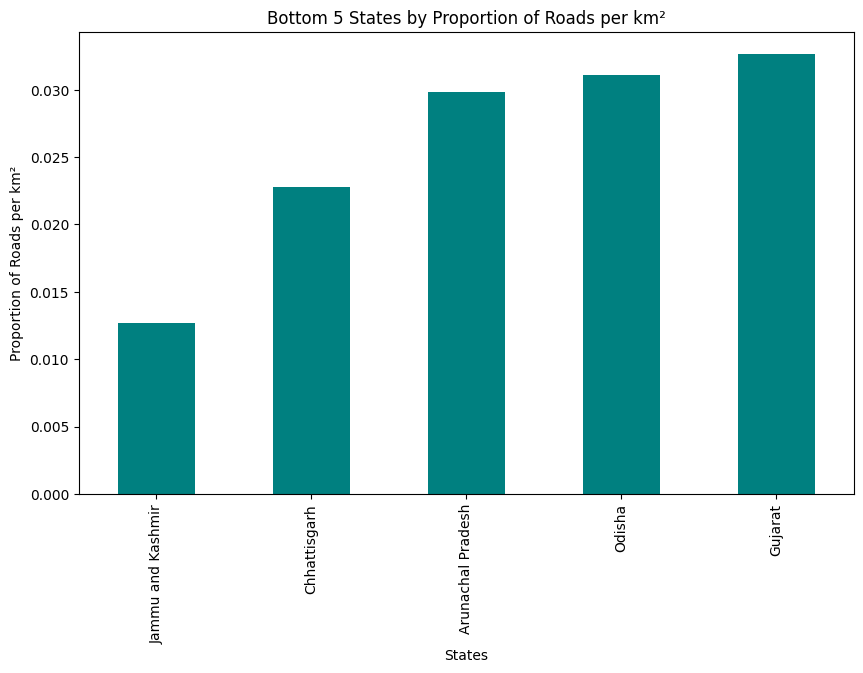

In [60]:
# Plotting the bottom 5 states
fig, ax = plt.subplots(figsize=(10, 6))
compiled_road_water_and_state_area_sorted.set_index("State")['Proportion Roads per km²'].plot(
    kind='bar', color='teal', ax=ax, title="Bottom 5 States by Proportion of Roads per km²"
)
ax.set_ylabel('Proportion of Roads per km²')
ax.set_xlabel('States')

plt.show()

Based on proprtion of area and lenght of connectivity, Jammu & Kashmir, Chattisgarh, Arunachal Pradesh, Odisha and Gujarat are the least ranking states with inadequate transportation. Comparing to the Golden Quadrilateral route, we can say that Gujarat, Odisha and Chattisgarh are somewhat better connected that Jammu & Kashmir and Arunachal Pradesh.

 Kashmir is a place of strategic defence importance to India, which is why it needs in detail research whether or not having a road/waterway will be in the national interest. However, if it is determined that a waterway is feasible in Kashmir, there is an abundance of water from the River Indus and its tributaries which can create an intricate system of waterways.
(Note: This suggestion is given without considering national boundaries and treaties. Indus is a river which flows from China to India and finally drains into the Arabian Sea in Pakistan)

Similarly, Arunchal Pradesh has the opportunity of using tributarties which inturn merge with the Brahmaputra river which is already a part of National Waterway -2. A little emphasis for this state can make a huge difference in the network and transportation of the state.